# Descriptive Data

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar
from scipy.stats import spearmanr
import seaborn as sns

In [2]:
dmeeting = pd.read_parquet('data_meeting1.parquet')
data_agenda1 = pd.read_parquet('data_agenda1.parquet')
data_agenda2 = pd.read_parquet('data_agenda2.parquet')
data_speech1 = pd.read_parquet('data_speech1.parquet')
data_speech2 = pd.read_parquet('data_speech2.parquet')

dagenda = pd.concat([data_agenda1, data_agenda2], axis=0)
dspeech = pd.concat([data_speech1, data_speech2], axis=0)

## Meeting Data

In [299]:
dmeeting

,meeting_id,url,date,day,time_start
0,1,https://www.ft.dk/forhandlinger/20151/20151M02...,2015-11-18,Onsdag,13.00
491,2,https://www.ft.dk/forhandlinger/20141/20141M05...,2015-02-04,Onsdag,13.00
728,3,https://www.ft.dk/forhandlinger/20151/20151M02...,2015-12-09,Onsdag,13.00
1092,4,https://www.ft.dk/forhandlinger/20151/20151M03...,2016-01-13,Onsdag,13.00
1691,5,https://www.ft.dk/forhandlinger/20141/20141M06...,2015-03-18,Onsdag,13.00
...,...,...,...,...,...
793578,1783,https://www.ft.dk/forhandlinger/20081/20081M03...,2008-12-19,Fredag,9.00
793985,1784,https://www.ft.dk/forhandlinger/20081/20081M05...,2009-02-03,Tirsdag,13.00
794302,1785,https://www.ft.dk/forhandlinger/20072/20072M00...,2007-11-28,Onsdag,13.00
794317,1786,https://www.ft.dk/forhandlinger/20072/20072M05...,2008-04-15,Tirsdag,13.00


In [32]:
print(f"First Meeting date: {dmeeting['date'].min()}")
print(f"Last Meeting date: {dmeeting['date'].max()}")

First Meeting date: 2007-10-02 00:00:00
Last Meeting date: 2023-09-07 00:00:00


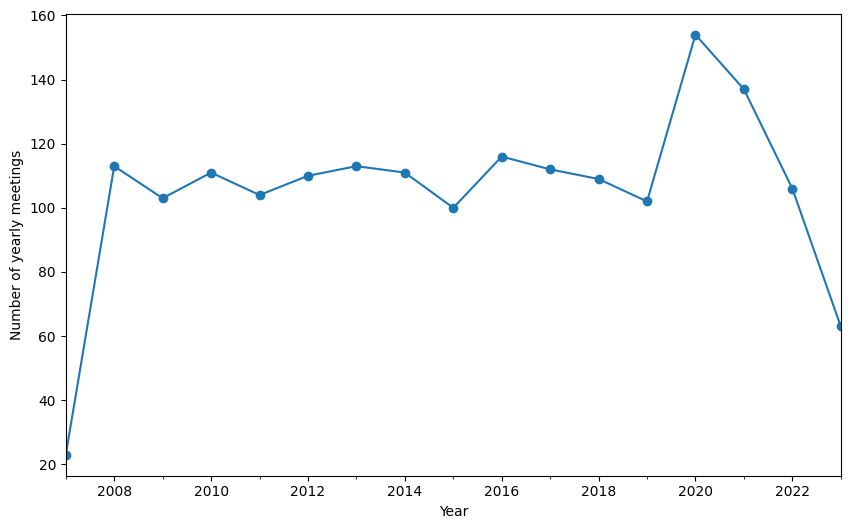

In [358]:
year_freq = dmeeting['date'].dt.to_period('Y').value_counts().sort_index()
plt.figure(figsize=(10,6))
year_freq.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of yearly meetings');

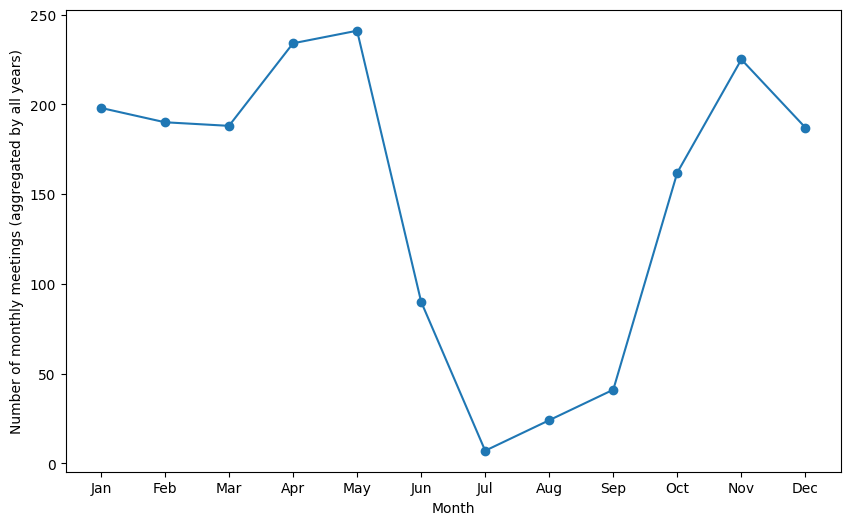

In [357]:
month_freq = dmeeting.groupby(dmeeting['date'].dt.month).size().sort_index()
month_freq
plt.figure(figsize=(10,6))
month_freq.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of monthly meetings (aggregated by all years)')
month_names = [calendar.month_abbr[month] for month in month_freq.index]
plt.xticks(month_freq.index, month_names);

In [354]:
dmeeting['day'].value_counts()

Tirsdag    486
Torsdag    464
Onsdag     443
Fredag     347
Mandag      47
Name: day, dtype: int64

In [362]:
dmeeting['time_start'].value_counts()[0:10]

13.00    768
10.00    767
9.00      79
12.00     56
10.15     18
11.00      8
09.00      7
14.30      5
13.15      5
10.10      4
Name: time_start, dtype: int64

## Agenda Data

In [12]:
dagenda

,meeting_id,agenda_item_id,title,type,speech_item_text,time_start,time_end,duration,number_of_words
0,1,1,Spm. nr. S 280: Om EU's trust fund.,1,Hvad er udenrigsministerens holdning til Socia...,13:01:40,13:10:22,522.0,647
1,1,2,Spm. nr. S 270: Om besparelser på kulturen.,2,"Tak for det. Kan ministeren bekræfte, at det e...",13:10:40,13:18:33,473.0,387
2,1,3,Spm. nr. S 271: Om besparelser på kulturen.,2,Jeg læser spørgsmålet op: Hvilke tiltag vil mi...,13:18:38,13:23:50,312.0,323
3,1,4,Spm. nr. S 264: Om forsinkelser og aflysninger...,2,Jeg vil gerne spørge: Hvad er ministerens hold...,13:23:57,13:30:04,367.0,592
4,1,5,Spm. nr. S 265: Om forsinkelser på Svendborgba...,2,"Ja, og det er en opfølgning: Jeg anerkender fu...",13:30:13,13:34:46,273.0,447
...,...,...,...,...,...,...,...,...,...
23851,1787,9,Spm. nr. S 301: Om folkepension.,2,"Der er mange pensionister, som ikke har nogen ...",17:34:05,17:41:23,438.0,601
23852,1787,10,Spm. nr. S 274: Om kønsmainstreaming,2,Det er op til det enkelte ministerium at vurde...,17:41:56,17:48:02,366.0,600
23853,1787,11,Spm. nr. S 298: Om SKAT.,2,"Jeg vil gerne starte med at sige, at jeg ikke ...",17:48:25,17:59:56,691.0,516
23854,1787,12,Spm. nr. S 299: Om regeringens plan mod sygefr...,2,Igennem de senere år har regeringen gennemført...,18:00:19,18:10:58,639.0,807


In [82]:
dagenda['type'].value_counts()

0    7773
2    7108
1     361
Name: type, dtype: int64

In [4]:
dagenda.groupby('type')['number_of_words'].mean().reset_index(name='Mean number of words per agenda item')

,type,mean_value
0,0,3497.288563
1,1,676.315789
2,2,672.800366


In [20]:
number_of_speech_items_agenda = dspeech.groupby(['meeting_id', 'agenda_item_id']).size().reset_index(name='count')
pd.merge(dagenda, number_of_speech_items_agenda).groupby('type')['count'].mean().reset_index(name='Mean number of speech items per agenda item')

,type,Mean number of speech items per agenda item
0,0,39.854368
1,1,8.437673
2,2,8.003517


count    15242.000000
mean      1981.367012
std       3522.544015
min          4.000000
25%        424.000000
50%        614.500000
75%       2540.000000
max      58567.000000
Name: duration, dtype: float64

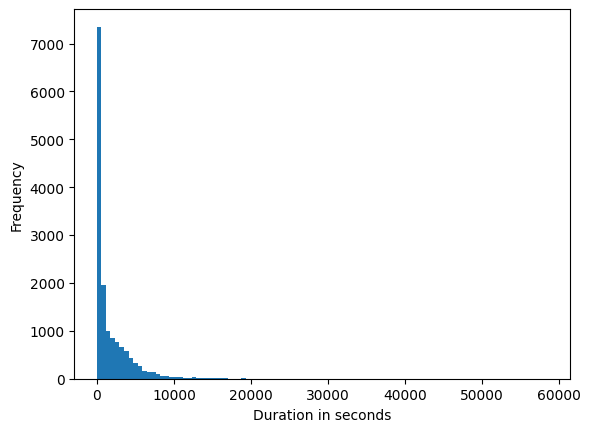

In [83]:
plt.hist(dagenda['duration'], bins = 100);
plt.xlabel('Duration in seconds')
plt.ylabel('Frequency')
dagenda['duration'].describe()

count    15242.000000
mean      2113.306259
std       4177.005636
min          3.000000
25%        559.000000
50%        789.000000
75%       2166.750000
max      97495.000000
Name: number_of_words, dtype: float64

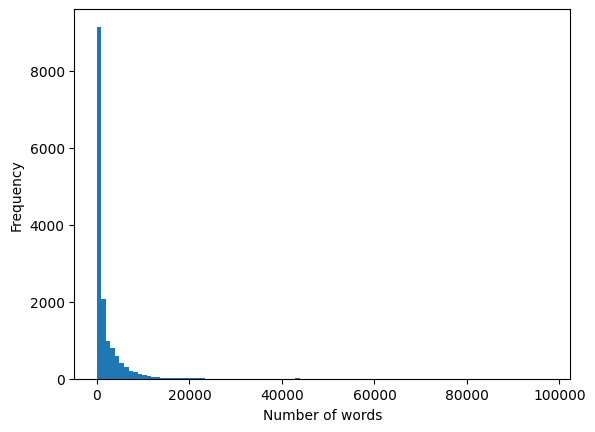

In [85]:
plt.hist(dagenda['number_of_words'], bins = 100);
plt.xlabel('Number of words')
plt.ylabel('Frequency')
dagenda['number_of_words'].describe()

Spearman correlation coefficient: 0.8374753154657678
P-value: 0.0


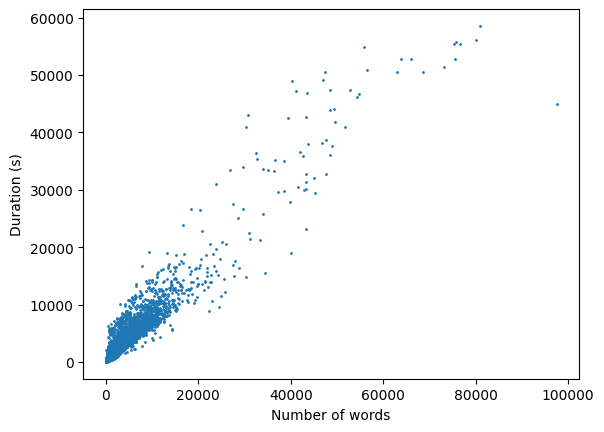

In [46]:
plt.scatter(x=dagenda['number_of_words'], y = dagenda['duration'], s=1);
plt.xlabel('Number of words');
plt.ylabel('Duration (s)');
correlation_coefficient, p_value = spearmanr(dagenda['number_of_words'], dagenda['duration'])
print(f"Spearman correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

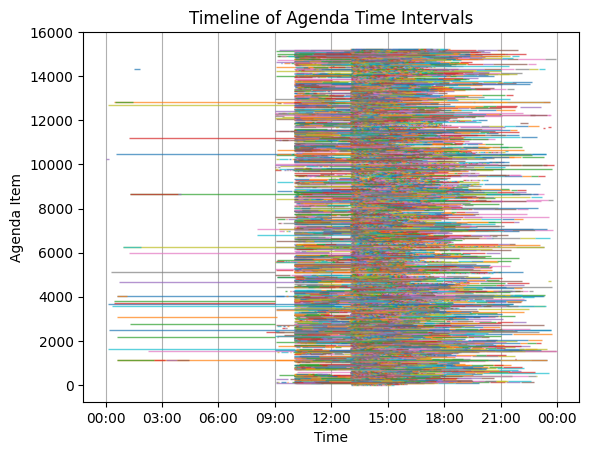

In [9]:
from matplotlib.dates import DateFormatter
import datetime

# Assuming 'start_times' and 'end_times' are your columns with start and end times
start_times = dagenda['time_start']
end_times = dagenda['time_end']

# Convert strings to datetime objects
start_times = [datetime.datetime.strptime(time, '%H:%M:%S') for time in start_times]
end_times = [datetime.datetime.strptime(time, '%H:%M:%S') for time in end_times]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the time intervals as horizontal lines on a timeline
for i, (start, end) in enumerate(zip(start_times, end_times)):
    ax.plot([start, end], [i, i], linewidth=1, solid_capstyle="butt", alpha=0.7)

# Beautify the plot
ax.xaxis_date()
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
#plt.yticks(range(len(start_times)), [f'Task {i+1}' for i in range(len(start_times))])
plt.xlabel('Time')
plt.ylabel('Agenda Item')
plt.title('Timeline of Agenda Time Intervals')
plt.grid(axis='x')

plt.show()


## Speech Data

In [38]:
dspeech

,meeting_id,agenda_item_id,speech_item_id,time_start,time_end,speaker_name,speaker_party,speaker_role,speaker_title,speech_item_text,duration,number_of_words
2,1,1,2,13:01:40,13:02:01,Jeppe Bruus,S,medlem,Jeppe Bruus(S):,Hvad er udenrigsministerens holdning til Socia...,21.0,45
4,1,1,4,13:02:03,13:04:09,Kristian Jensen,None,minister,Udenrigsministeren(Kristian Jensen):,"Min holdning er, at vi til enhver tid skal bru...",126.0,42
6,1,1,6,13:04:10,13:06:09,Jeppe Bruus,S,medlem,Jeppe Bruus(S):,"Når jeg spørger til det her, er det, fordi vi ...",119.0,84
8,1,1,8,13:06:10,13:07:34,Kristian Jensen,None,minister,Udenrigsministeren(Kristian Jensen):,"Hvis man kigger på den indsats, der skal gøres...",84.0,126
10,1,1,10,13:07:35,13:08:12,Jeppe Bruus,S,medlem,Jeppe Bruus(S):,"Jeg synes ikke, jeg fik noget konkret svar, i ...",37.0,125
...,...,...,...,...,...,...,...,...,...,...,...,...
795166,1787,13,6,18:14:39,18:15:42,Claus Hjort Frederiksen,None,minister,Beskæftigelsesministeren(Claus Hjort Frederiks...,"Det er naturligvis ikke alle syge, der skal el...",63.0,41
795168,1787,13,8,18:15:43,18:16:55,Eigil Andersen,SF,medlem,Eigil Andersen(SF):,"Der er noget rigtigt i, at der i visse tilfæld...",72.0,70
795170,1787,13,10,18:16:56,18:18:05,Claus Hjort Frederiksen,None,minister,Beskæftigelsesministeren(Claus Hjort Frederiks...,"Vi har allerede en del viden om, hvordan vi ve...",69.0,38
795172,1787,13,12,18:18:07,18:19:20,Eigil Andersen,SF,medlem,Eigil Andersen(SF):,"Ministeren indrømmer jo faktisk her, at der ik...",73.0,49


count    369723.000000
mean         71.436129
std          68.713676
min           0.000000
25%          35.000000
50%          51.000000
75%          72.000000
max         793.000000
Name: duration, dtype: float64

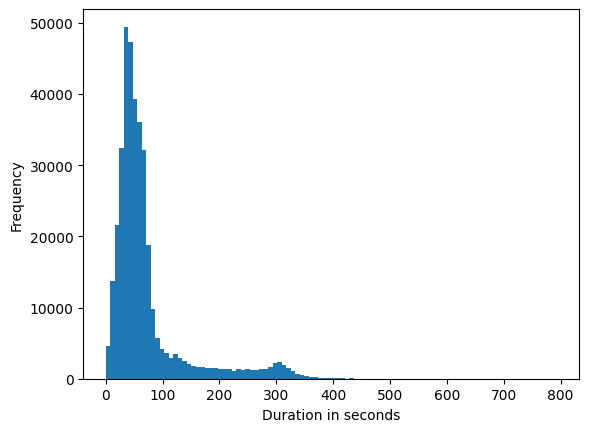

In [40]:
plt.hist(dspeech['duration'], bins = 100);
plt.xlabel('Duration in seconds')
plt.ylabel('Frequency')
dspeech['duration'].describe()

count    369723.000000
mean         87.121545
std          47.581540
min           1.000000
25%          54.000000
50%          82.000000
75%         114.000000
max        3397.000000
Name: number_of_words, dtype: float64

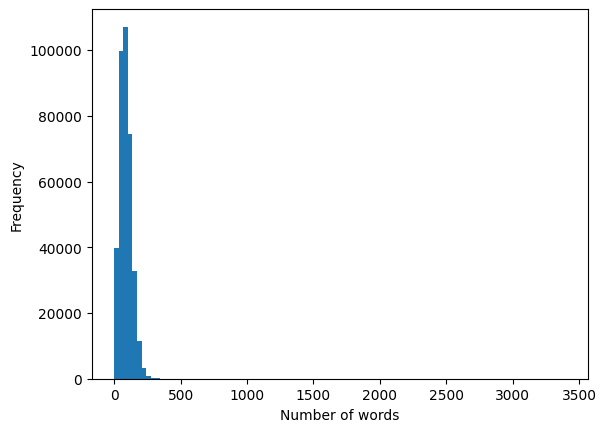

In [43]:
plt.hist(dspeech['number_of_words'], bins = 100);
plt.xlabel('Number of words')
plt.ylabel('Frequency')
dspeech['number_of_words'].describe()

Spearman correlation coefficient: 0.1889739238489312
P-value: 0.0


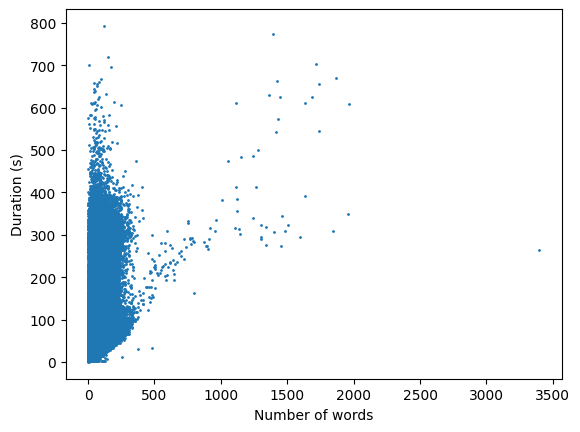

In [47]:
plt.scatter(x=dspeech['number_of_words'], y = dspeech['duration'], s=1);
plt.xlabel('Number of words');
plt.ylabel('Duration (s)');
correlation_coefficient, p_value = spearmanr(dspeech['number_of_words'], dspeech['duration'])
print(f"Spearman correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

In [26]:
dspeech['speaker_name'].value_counts()[0:25]

Mette Frederiksen         4294
Ole Birk Olesen           4262
Per Clausen               4195
Inger Støjberg            3539
Finn Sørensen             3379
Morten Messerschmidt      3287
Christian Juhl            3282
Lars Løkke Rasmussen      3162
Martin Henriksen          3101
Morten Bødskov            3042
Frank Aaen                2945
Karsten Lauritzen         2940
Benny Engelbrecht         2914
Peter Skaarup             2813
Lisbeth Bech Poulsen      2747
Morten Østergaard         2717
Simon Emil Ammitzbøll     2714
Mattias Tesfaye           2633
Hans Kristian Skibby      2630
Line Barfod               2629
Bent Bøgsted              2600
Kristian Thulesen Dahl    2548
Rasmus Prehn              2486
Erling Bonnesen           2465
Nick Hækkerup             2436
Name: speaker_name, dtype: int64

In [34]:
dspeech['speaker_party'].value_counts()

S      50484
DF     48668
V      46471
EL     41316
SF     30905
RV     22399
KF     20659
LA     17238
ALT     9572
NB      6151
UFG     2273
DD      1782
IA      1395
M       1244
KD       822
FG       655
SIU      646
JF       570
NY       537
SP       376
T        287
TF       142
NQ        97
Name: speaker_party, dtype: int64

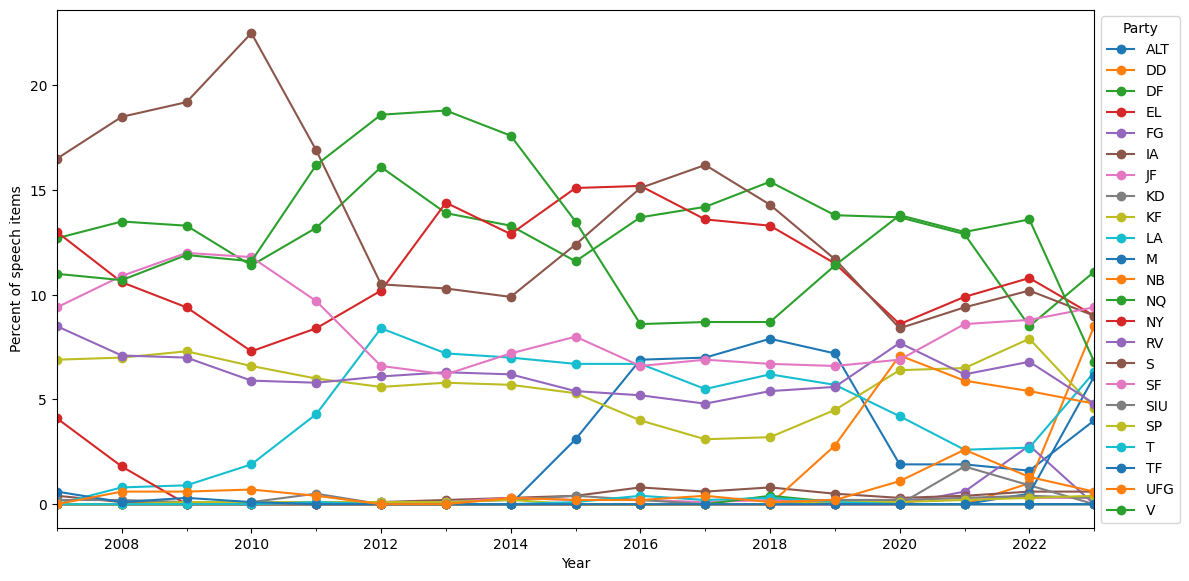

In [128]:
dspeech_year = pd.merge(dspeech, dmeeting[['meeting_id', 'date']])
dspeech_year['year'] = dspeech_year['date'].dt.to_period('Y')
number_of_speech_years = dspeech_year.groupby('year').size().reset_index(name='number_of_speech_year')
party_year = dspeech_year.groupby(['speaker_party', 'year']).size().reset_index(name='Counts')
party_year = pd.merge(party_year, number_of_speech_years, on='year')
party_year['Percent'] = round((party_year['Counts'] / party_year['number_of_speech_year'])*100, 1)
party_year_pivot = party_year.pivot(index='year', columns='speaker_party', values='Percent').fillna(0)

ax = party_year_pivot.plot(kind='line', marker='o', figsize=(12, 6))

plt.xlabel('Year')
plt.ylabel('Percent of speech items')
plt.legend(title='Party')
ax.legend(title='Party', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.tight_layout() 
plt.show()

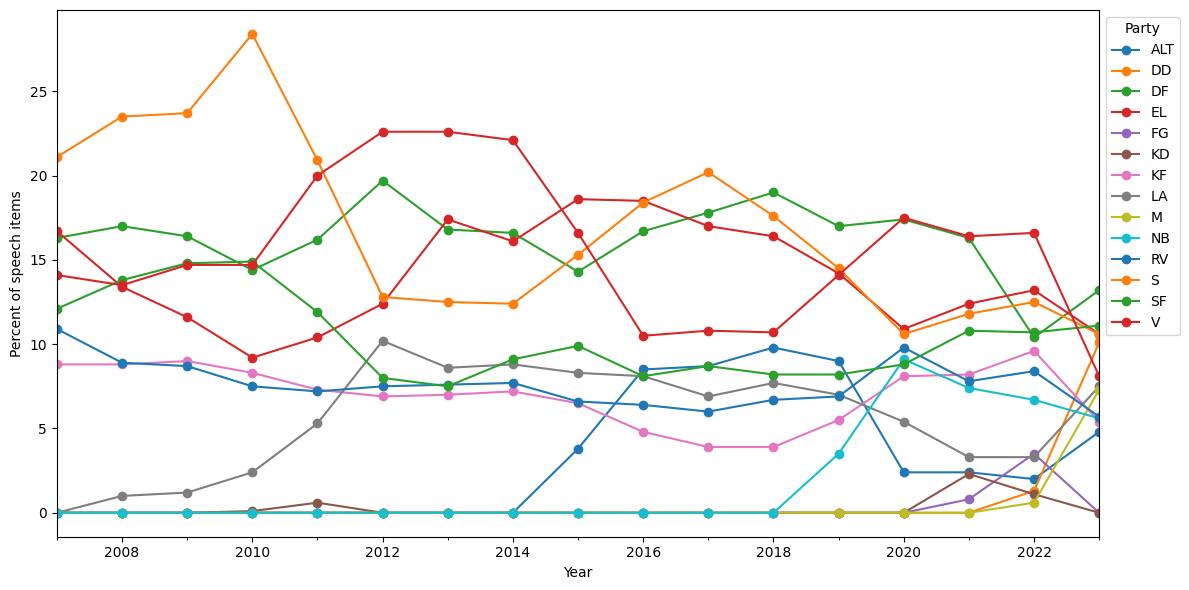

In [127]:
dspeech_year = pd.merge(dspeech, dmeeting[['meeting_id', 'date']])
dspeech_year['year'] = dspeech_year['date'].dt.to_period('Y')
dspeech_year = dspeech_year[dspeech_year['speaker_party'].isin(['S', 'DF', 'ALT', 'DD', 'EL', 'FG', 'KD', 'KF', 'LA', 'M', 'NB', 'RV', 'S', 'SF', 'V'])]
number_of_speech_years = dspeech_year.groupby('year').size().reset_index(name='number_of_speech_year')
party_year = dspeech_year.groupby(['speaker_party', 'year']).size().reset_index(name='Counts')
party_year = pd.merge(party_year, number_of_speech_years, on='year')
party_year['Percent'] = round((party_year['Counts'] / party_year['number_of_speech_year'])*100, 1)
party_year_pivot = party_year.pivot(index='year', columns='speaker_party', values='Percent').fillna(0)

ax = party_year_pivot.plot(kind='line', marker='o', figsize=(12, 6))

plt.xlabel('Year')
plt.ylabel('Percent of speech items')
plt.legend(title='Party')
ax.legend(title='Party', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.tight_layout() 
plt.show()

In [129]:
dspeech['speaker_role'].value_counts()

medlem                 304375
minister                64816
fungerende minister       532
Name: speaker_role, dtype: int64